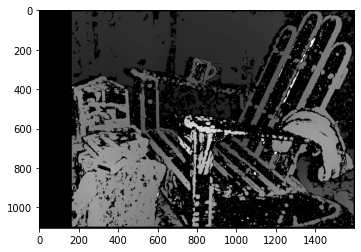

Success


In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



# l = cv2.imread('left/1.jpg')
# r = cv2.imread('right/1.jpg')

r = cv2.imread('/home/aadiv/Documents/WPI/Fall 21/RBE 549 - Computer Vision/Project/L.jpeg')
l = cv2.imread('/home/aadiv/Documents/WPI/Fall 21/RBE 549 - Computer Vision/Project/R.jpeg')

# print(imgL)
# print(imgR)

imgL = cv2.cvtColor(l, cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(r, cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoBM_create(numDisparities=160, blockSize=15)
disparity = stereo.compute(imgL,imgR)

plt.imshow(disparity,'gray')
plt.show()

print("Success")

In [37]:
def create_output(vertices, colors, filename):
	colors = colors.reshape(-1,3)
	vertices = np.hstack([vertices.reshape(-1,3),colors])

	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar red
		property uchar green
		property uchar blue
		end_header
		'''
	with open(filename, 'w') as f:
		f.write(ply_header %dict(vert_num=len(vertices)))
		np.savetxt(f,vertices,'%f %f %f %d %d %d')

#Function that Downsamples image x number (reduce_factor) of times. 
def downsample_image(image, reduce_factor):
	for i in range(0,reduce_factor):
		#Check if image is color or grayscale
		if len(image.shape) > 2:
			row,col = image.shape[:2]
		else:
			row,col = image.shape

		image = cv2.pyrDown(image, dstsize= (col//2, row // 2))
	return image

def write_ply(fn, verts, colors):
    ply_header = '''ply
    format ascii 1.0
    element vertex %(vert_num)d
    property float x
    property float y
    property float z
    property uchar red
    property uchar green
    property uchar blue
    end_header
    '''
    out_colors = colors.copy()
    verts = verts.reshape(-1, 3)
    verts = np.hstack([verts, out_colors])
    with open(fn, 'wb') as f:
        f.write((ply_header % dict(vert_num=len(verts))).encode('utf-8'))
        np.savetxt(f, verts, fmt='%f %f %f %d %d %d ')

In [11]:
f = 3997.684
q2 = np.float32([[1,0,0,0],
                [0,-1,0,0],
                [0,0,f*0.05,0],
                [0,0,0,1]])
points3d = cv2.reprojectImageTo3D(disparity,q2)

# plt.show(points3d)
# print(points3d)

In [22]:
colors = cv2.cvtColor(l, cv2.COLOR_BGR2RGB)
#Get rid of points with value 0 (i.e no depth)
mask_map = disparity > disparity.min()
#Mask colors and points. 
output_points = points3d[mask_map]
output_colors = colors[mask_map]
#Define name for output file
output_file = 'reconstructed.ply'
#Generate point cloud 
print ("\n Creating the output file... \n")
create_output(output_points, output_colors, output_file)
print("Complete")


 Creating the output file... 

Complete


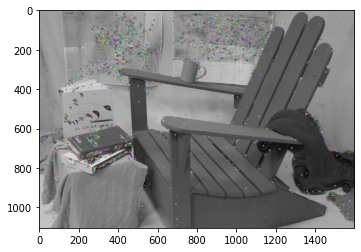

In [4]:
gray = cv2.cvtColor(r,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,r)

plt.imshow(img,'gray')
plt.show()

In [31]:
cam1 = np.array([[3997.684, 0, 1176.728], [0, 3997.684, 1011.728], [0, 0, 1]])
cam2 = np.array([[3997.684, 0, 1307.839], [0, 3997.684, 1011.728], [0, 0, 1]])
doffs = 131.111
baseline = 193.001
width = 2964
height = 1988
ndisp = 280
isint = 0
vmin = 31
vmax = 257
dyavg = 0.918
dymax = 1.516

In [38]:
# Calculate depth-to-disparity


# print(cam1)

Tmat = np.array([0.54, 0., 0.])

rev_proj_matrix = np.zeros((4,4))

cv2.stereoRectify(cameraMatrix1 = cam1,cameraMatrix2 = cam2, \
                  distCoeffs1 = 0, distCoeffs2 = 0, \
                  imageSize = l.shape[:2], \
                  R = np.identity(3), T = Tmat, \
                  R1 = None, R2 = None, \
                  P1 =  None, P2 =  None, Q = rev_proj_matrix);

print(type(rev_proj_matrix))


<class 'numpy.ndarray'>


In [54]:
points = cv2.reprojectImageTo3D(imgL, rev_proj_matrix)

print(imgL.shape)

#reflect on x axis
reflect_matrix = np.identity(3)
reflect_matrix[0] *= -1
points = np.matmul(points,reflect_matrix)

print("points",points.shape)

#extract colors from image
colors = cv2.cvtColor(l, cv2.COLOR_BGR2RGB)

#filter by min disparity
mask = imgL > imgL.min()
out_points = points[mask]
out_colors = colors[mask]

print(out_points)

#filter by dimension
idx = np.fabs(out_points[:,0]) < 4.5
out_points = out_points[idx]
out_colors = out_colors.reshape(-1, 3)
out_colors = out_colors[idx]

create_output(out_points, out_colors, 'output.ply')
print('%s saved' % 'out.ply')

(1104, 1600)
points (1104, 1600, 3)
[[ -4.41337585   3.59429693 -14.20229912]
 [ -4.40982342   3.59429693 -14.20229912]
 [ -4.4062705    3.59429693 -14.20229912]
 ...
 [  1.07610607  -0.2768926  -12.12780571]
 [  1.07913983  -0.2768926  -12.12780571]
 [  1.08217359  -0.2768926  -12.12780571]]
out.ply saved
